In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('CC_GENERAL.csv')
X = dataset.iloc[:, 1:].values

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=0, copy=True)
imputer = imputer.fit(X)
X = imputer.transform(X)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\impute\_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

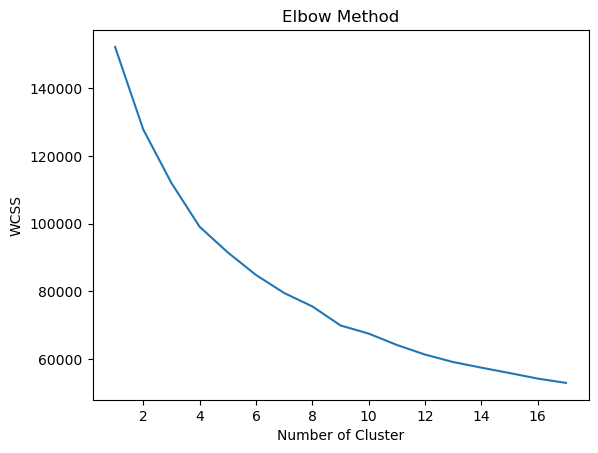

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,18):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,18), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [17]:
dataset['Cluster'] = y_kmeans
dataset.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        3  
2   622.066742        627.284787          0.000000      12        5  
3     0.000000               NaN          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0